# Jobsheet 7 - Perceptron

Identitas

NIM     : 2041720099

Nama    : Rofika Nur 'Aini

Kelas   : TI-3B

## Tujuan

1. Mahasiswa mampu menerapkan perceptron dalam sebuah kasus sederhana
2. Mahasiswa mampu menerapkan perceptron di dalam metode berbasis neural network

## Kegiatan Praktikum
Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis dari luaran penerapan perceptron dan metode berbasis neural network yang dijalankan. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai serta karakteristik yang sesuai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan perceptron dan neural network.

### Kegiatan 1 - Perceptron I

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


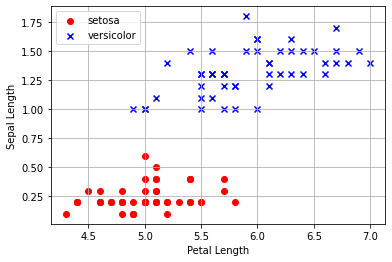

In [4]:
# pembacaan data dan visualisasi

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [5]:
# Pembuatan kelas Perceptron
# pada jobsheet ini, penerapan perceptron dibuat dalam satu kelas khusus

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10): #eta = alfa, n_iter= epoch
        self.eta = eta          #constructor
        self.n_iter = n_iter    #constructor
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):    #zip membuat tuple dari 2 data, xi = fitur, target = label
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    #activation functions
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] #X = fitur
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

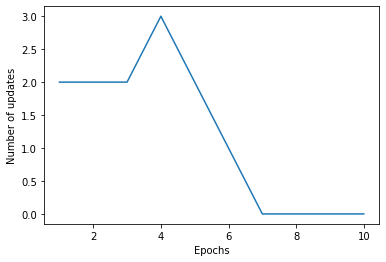

In [6]:
# penerapan perceptron
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 3]].values


ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# plot the error for each epoch to check for convergence
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [7]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

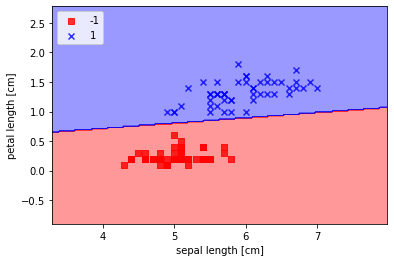

In [8]:
# hasil plot 

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Kegiatan 2 - Perceptron II

Pada kegiatan ini, praktik yang dilakukan adalah untuk menyelesaikan kasus klasifikasi dokumen. Perceptron yang diimplementasikan berasal dari library Scikit-Learn.

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [10]:
# persiapan kategori data yang diklasifikasi

categories = ['rec.sport.hockey','rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories,remove=('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',categories=categories,remove=('headers','footers','quotes'))

In [11]:
# penerapan klasifikasi dokumen

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
clf = Perceptron(random_state=11)
clf.fit(X_train,newsgroups_train.target)
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### Kegiatan 3 - Neural Network

In [12]:
# data yang dibaca adalah data wine,
# data ini belum memiliki nama variabel setiap kolom sehingga nama variabel baru ini dibuat melalui names

wine = pd.read_csv('./drive/MyDrive/Colab Notebooks/wine.csv',names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# deskripsi data dengan bentuk tampilan dibalik dari umumnya
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [14]:
# output: ditemukan 178 data dengan 13 fitur dan 1 kolom label

wine.shape

(178, 14)

In [15]:
# penentuan variabel X dan y
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [16]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Data Preprocessing

Penerapan neural network (terutama di Python) mengalami kesulitan dalam mengolah data ketika data tersebut belum dinormalisasi. Multilayer perceptron sensitif terhadap feature scaling sehingga perlu dilakukan penskalaan data terlebih dahulu. Contoh standarisasi ini dapat dilakukan menggunakan StandardScaler.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
# fitting pada data training

scaler.fit(X_train)

StandardScaler()

In [19]:
# standarisasi
StandardScaler(copy=True, with_mean=True, with_std=True)

# transformasi data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training Model

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
# pada parameter hidden_layer_sizes, tentukan jumlah neuron yang diperlukan pada setiap layer.
# Pada contoh ini hanya digunakan 3 buah layer dengan jumlah iterasi maksimal sebanyak 500 kali

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


# fitting data tarining terhadap mlp
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

#### Prediksi dan Evaluasi

In [22]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 1 25  0]
 [ 0  0  7]]


In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00         7

    accuracy                           0.98        45
   macro avg       0.97      0.99      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
# ekstraksi bobot dan bias MLP setelah training model
# coefs_ adalah matriks bobot, matriks bobot pada indeks i menandakan bobot di antara layer i dan layer i+1

len(mlp.coefs_)

4

In [25]:
len(mlp.coefs_[0])

13

In [26]:

# intercepts_ adalah vektor bias, vektor pada indeks i menandakan nilai bias yang ditambahkan pada layer i+1
len(mlp.intercepts_[0])

13

### Tugas

In [1]:
#dataset import
dataset = pd.read_csv('./drive/MyDrive/Colab Notebooks/wine.csv',names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
dataset.head(10) #Return 10 rows of data

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [2]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [3]:
dataset.shape

(178, 14)

In [4]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [5]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit(X_train)

# standarisasi
StandardScaler(copy=True, with_mean=True, with_std=True)

# transformasi data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [7]:
y_train

array([3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 3, 2, 2, 3, 2, 3, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 2, 1, 1,
       2, 3, 3, 3, 1, 2, 1, 2, 2, 3, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2,
       3, 1, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 2,
       1, 3, 3, 3, 1, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3,
       3, 3, 3, 3, 3, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2,
       1])

In [8]:
X_train.shape

(133, 13)

In [9]:
X_test.shape

(45, 13)

**Nueral Network without hidden Layer**

In [12]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [13]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.947, Test: 0.889


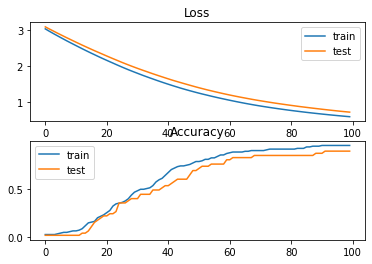

In [15]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

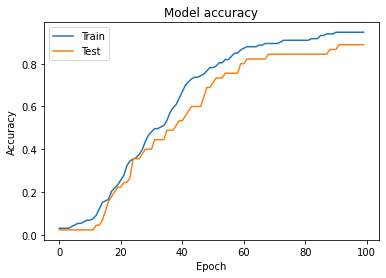

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Neural Network with hidden layer**

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(13,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [18]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.956


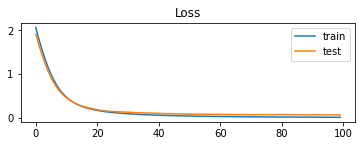

In [21]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

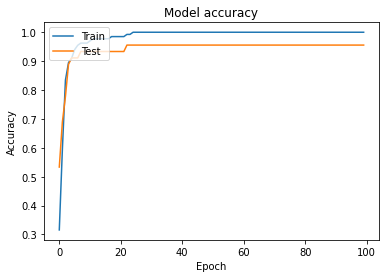

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()